In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plt.style.use('ggplot')

In [14]:
train1_df = pd.read_csv('BATADAL_dataset03.csv', index_col=0)
train2_df = pd.read_csv('BATADAL_dataset04.csv', index_col=0)
test_df = pd.read_csv('BATADAL_test_dataset.csv', index_col=0)

train1_df.drop(['ATT_FLAG'], axis=1, inplace=True)
train1_df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


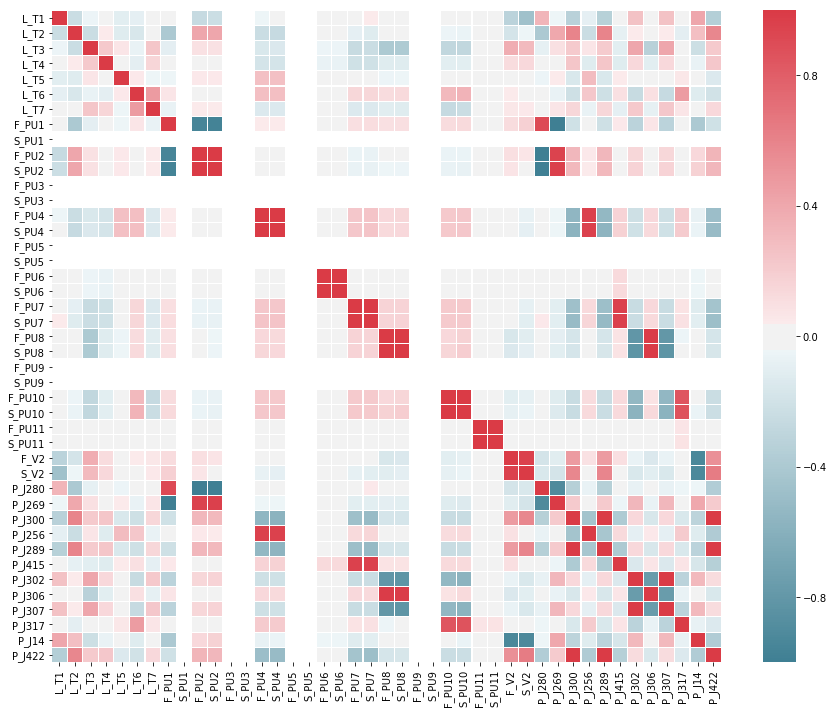

In [21]:
# calculate the correlation matrix
f, ax = plt.subplots(figsize=(15, 12))

corr = train1_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=cmap,
        linewidth=.1)

plt.show()

**Behaviour of T1**

F_PU1 and F_PU2 have the same flow while both pumps opened

PU2 closed:
    * F_PU2 discrases drastically to 0
    * F_PU1 increases over about 20
    * L_T1 dicreases
    * P_J269 dicreases -- pressure, as the total flow dicreases
    * P_J280 stayes on the same level
    
S_PU1 seems always opened and S_PU3 seems always closed

Frequency are different (within opening/closing the pumps)

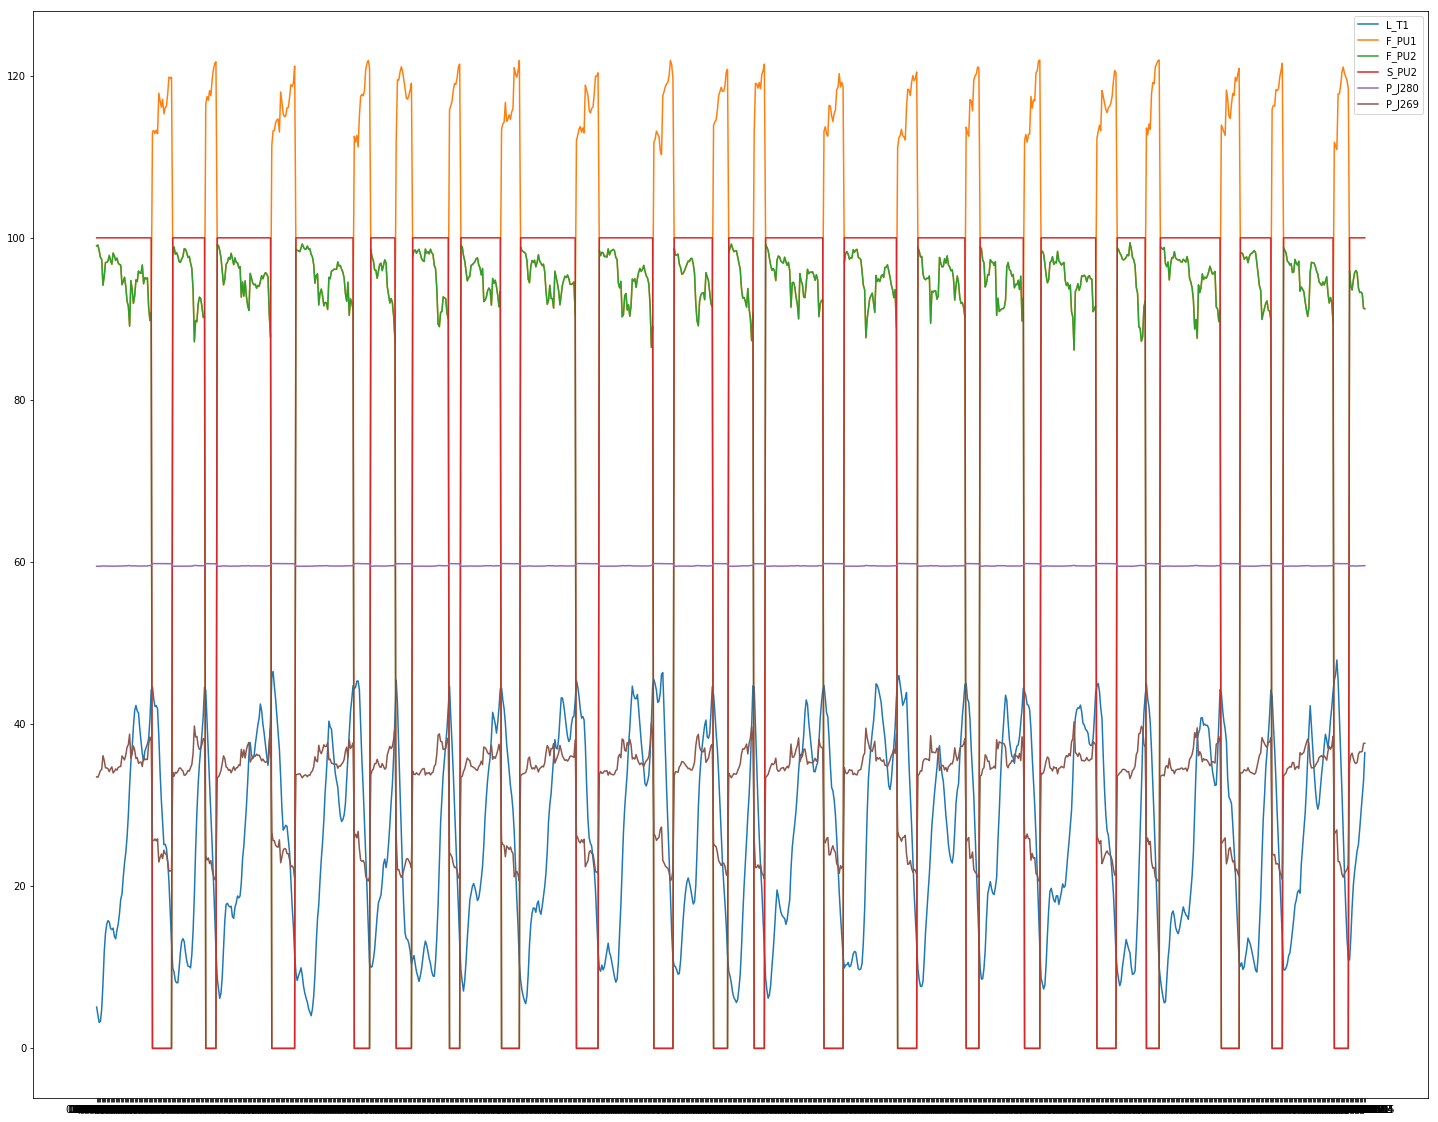

In [3]:
f, ax = plt.subplots(figsize=(25, 20))

st = 0
it = st + 1000
plt.plot(10*train1_df['L_T1'].iloc[st:it])
plt.plot(train1_df['F_PU1'].iloc[st:it])
plt.plot(train1_df['F_PU2'].iloc[st:it]) 
# plt.plot(train1_df['F_PU3'].iloc[st:it])
# plt.plot(120*train1_df['S_PU1'].iloc[st:it]) #seems always opened ?
plt.plot(100*train1_df['S_PU2'].iloc[st:it])
# plt.plot(100*train1_df['S_PU3'].iloc[st:it]) #seems always closed ?
plt.plot(20*train1_df['P_J280'].iloc[st:it]) # no correlation -- constant ??
plt.plot(train1_df['P_J269'].iloc[st:it])

plt.legend()
plt.show()

**Bahaviour of T5**

Mostly controlled by PU8, PU9 is not even in the rules


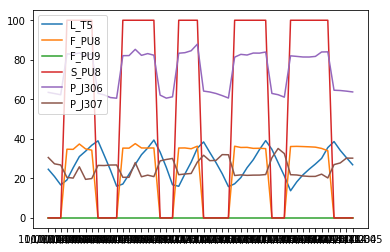

In [4]:
st = 100
it = st + 50
plt.plot(10*train1_df['L_T5'].iloc[st:it])
# plt.plot(20*train1_df['L_T7'].iloc[st:it])
plt.plot(train1_df['F_PU8'].iloc[st:it])
plt.plot(train1_df['F_PU9'].iloc[st:it]) # always closed -- to show though!
# plt.plot(train1_df['F_PU10'].iloc[st:it])
# plt.plot(train1_df['F_PU11'].iloc[st:it])

plt.plot(100*train1_df['S_PU8'].iloc[st:it])
# plt.plot(100*train1_df['S_PU9'].iloc[st:it]) # always closed
# plt.plot(100*train1_df['S_PU10'].iloc[st:it]) 
# plt.plot(100*train1_df['S_PU11'].iloc[st:it]) # always closed

# plt.plot(train1_df['P_J302'].iloc[st:it]) # no correlation
plt.plot(train1_df['P_J306'].iloc[st:it]) # this is for PU9

plt.plot(train1_df['P_J307'].iloc[st:it]) # from PU10 -> maybe??
# plt.plot(train1_df['P_J317'].iloc[st:it]) # 

plt.legend()
plt.show()

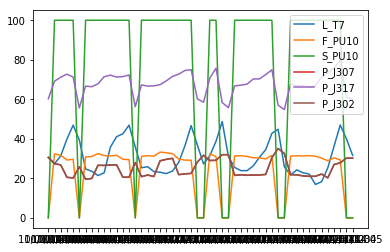

In [85]:
st = 100
it = st + 50
plt.plot(10*train1_df['L_T7'].iloc[st:it])

plt.plot(train1_df['F_PU10'].iloc[st:it])
# plt.plot(train1_df['F_PU11'].iloc[st:it])

plt.plot(100*train1_df['S_PU10'].iloc[st:it]) 
# plt.plot(100*train1_df['S_PU11'].iloc[st:it]) # always closed

plt.plot(train1_df['P_J307'].iloc[st:it]) # not much correlated! Sth must be affected by it! -> maybe PU8??
plt.plot(train1_df['P_J317'].iloc[st:it]) # 



plt.legend()
plt.show()

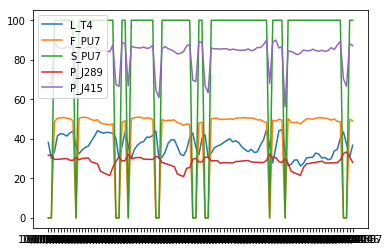

In [5]:
st = 100
it = st + 100
plt.plot(10*train1_df['L_T4'].iloc[st:it])

# plt.plot(train1_df['F_PU6'].iloc[st:it])
plt.plot(train1_df['F_PU7'].iloc[st:it])

# plt.plot(100*train1_df['S_PU6'].iloc[st:it])  # always closed
plt.plot(100*train1_df['S_PU7'].iloc[st:it])

plt.plot(train1_df['P_J289'].iloc[st:it]) # not much correlated! Sth must be affected by it! -> V2!
plt.plot(train1_df['P_J415'].iloc[st:it]) # 

plt.legend()
plt.show()

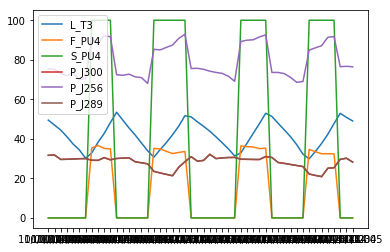

In [82]:
st = 100
it = st + 50
plt.plot(10*train1_df['L_T3'].iloc[st:it])

plt.plot(train1_df['F_PU4'].iloc[st:it])
# plt.plot(train1_df['F_PU5'].iloc[st:it])  # always closed

plt.plot(100*train1_df['S_PU4'].iloc[st:it]) 
# plt.plot(100*train1_df['S_PU5'].iloc[st:it])  # always closed

plt.plot(train1_df['P_J300'].iloc[st:it]) # not much correlated! Sth must be affected by it! -> V2
plt.plot(train1_df['P_J256'].iloc[st:it]) # is for PU5 though

plt.legend()
plt.show()

**Valve V2**

V2 opened 
    * P_J14 and P_J422 has same values
    * F_V2 raises drastically but the flow decreases (usually not steadily)
V2 closed P_J14 raises and P_J422 decreases
P_J422 and P_J289 (from PU6) strongly correlated (same values!)



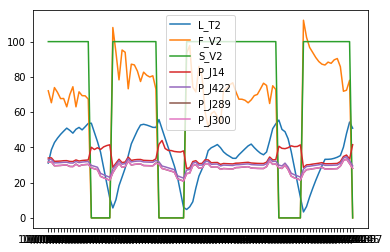

In [88]:
st = 100
it = st + 100
plt.plot(10*train1_df['L_T2'].iloc[st:it])

plt.plot(train1_df['F_V2'].iloc[st:it])

plt.plot(100*train1_df['S_V2'].iloc[st:it]) 

plt.plot(train1_df['P_J14'].iloc[st:it]) # 
plt.plot(train1_df['P_J422'].iloc[st:it]) # 

plt.plot(train1_df['P_J289'].iloc[st:it]) # from PU6
plt.plot(train1_df['P_J300'].iloc[st:it]) # from PU5


plt.legend()
plt.show()